# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
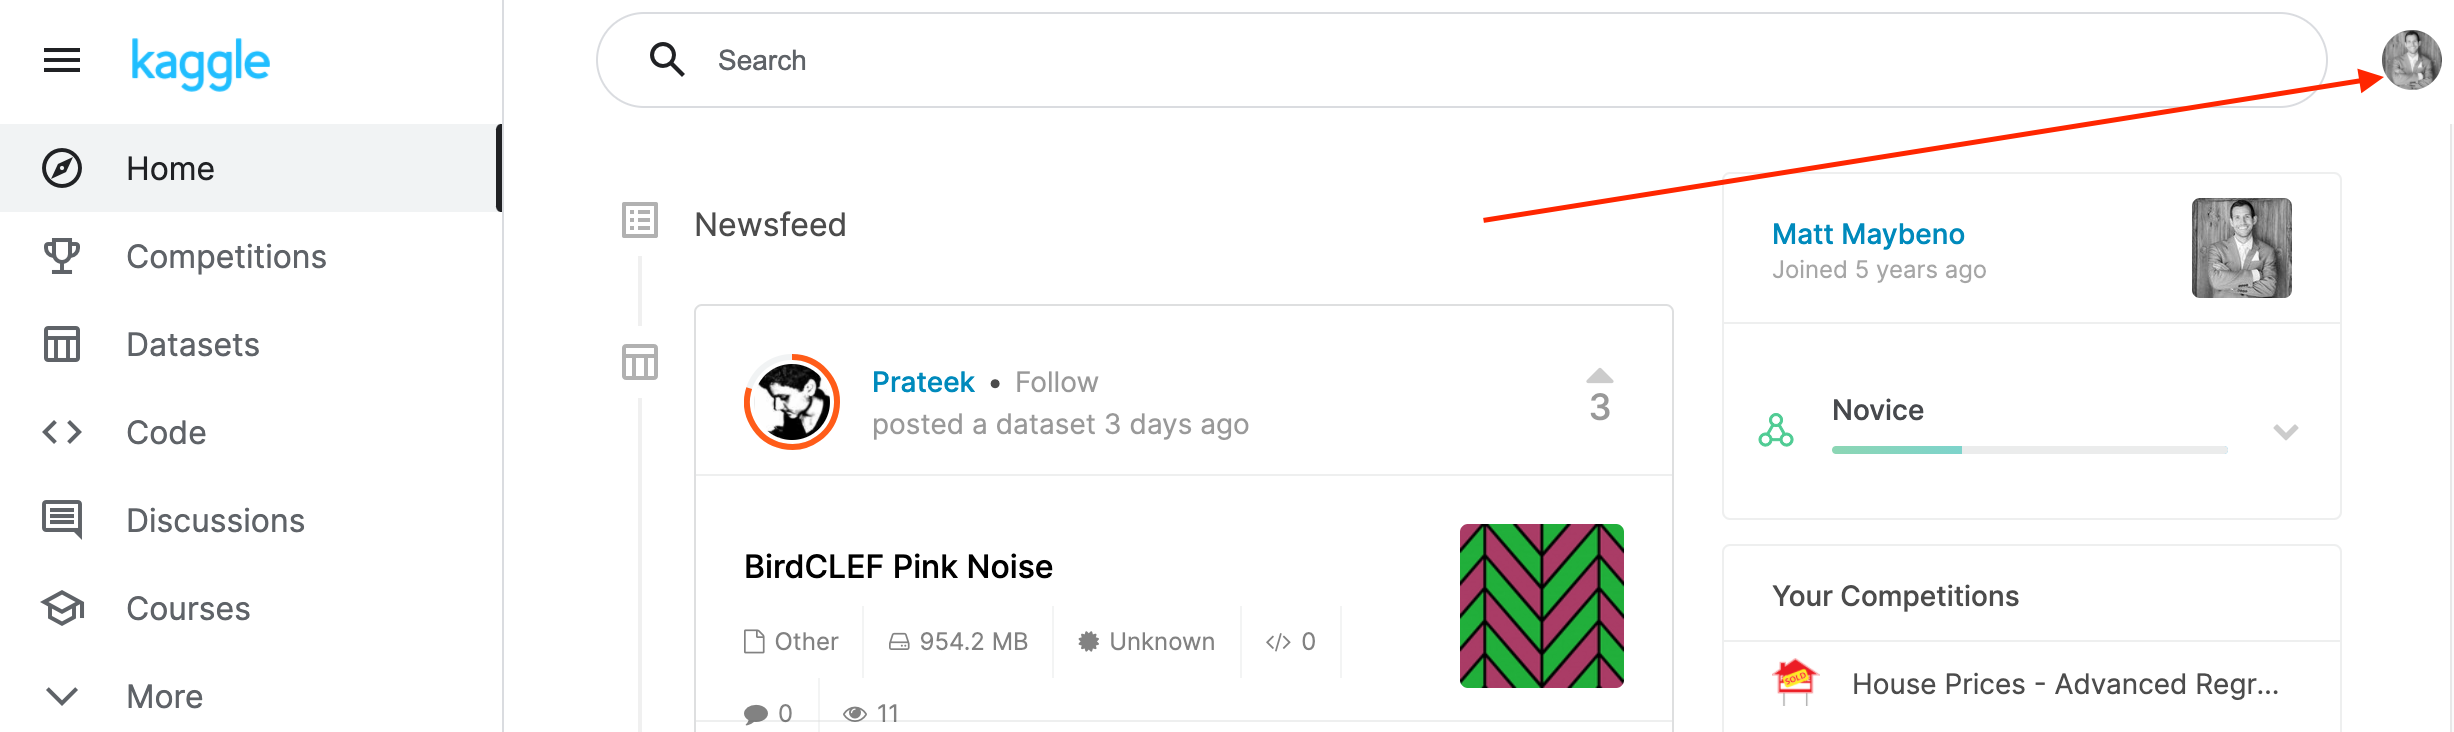
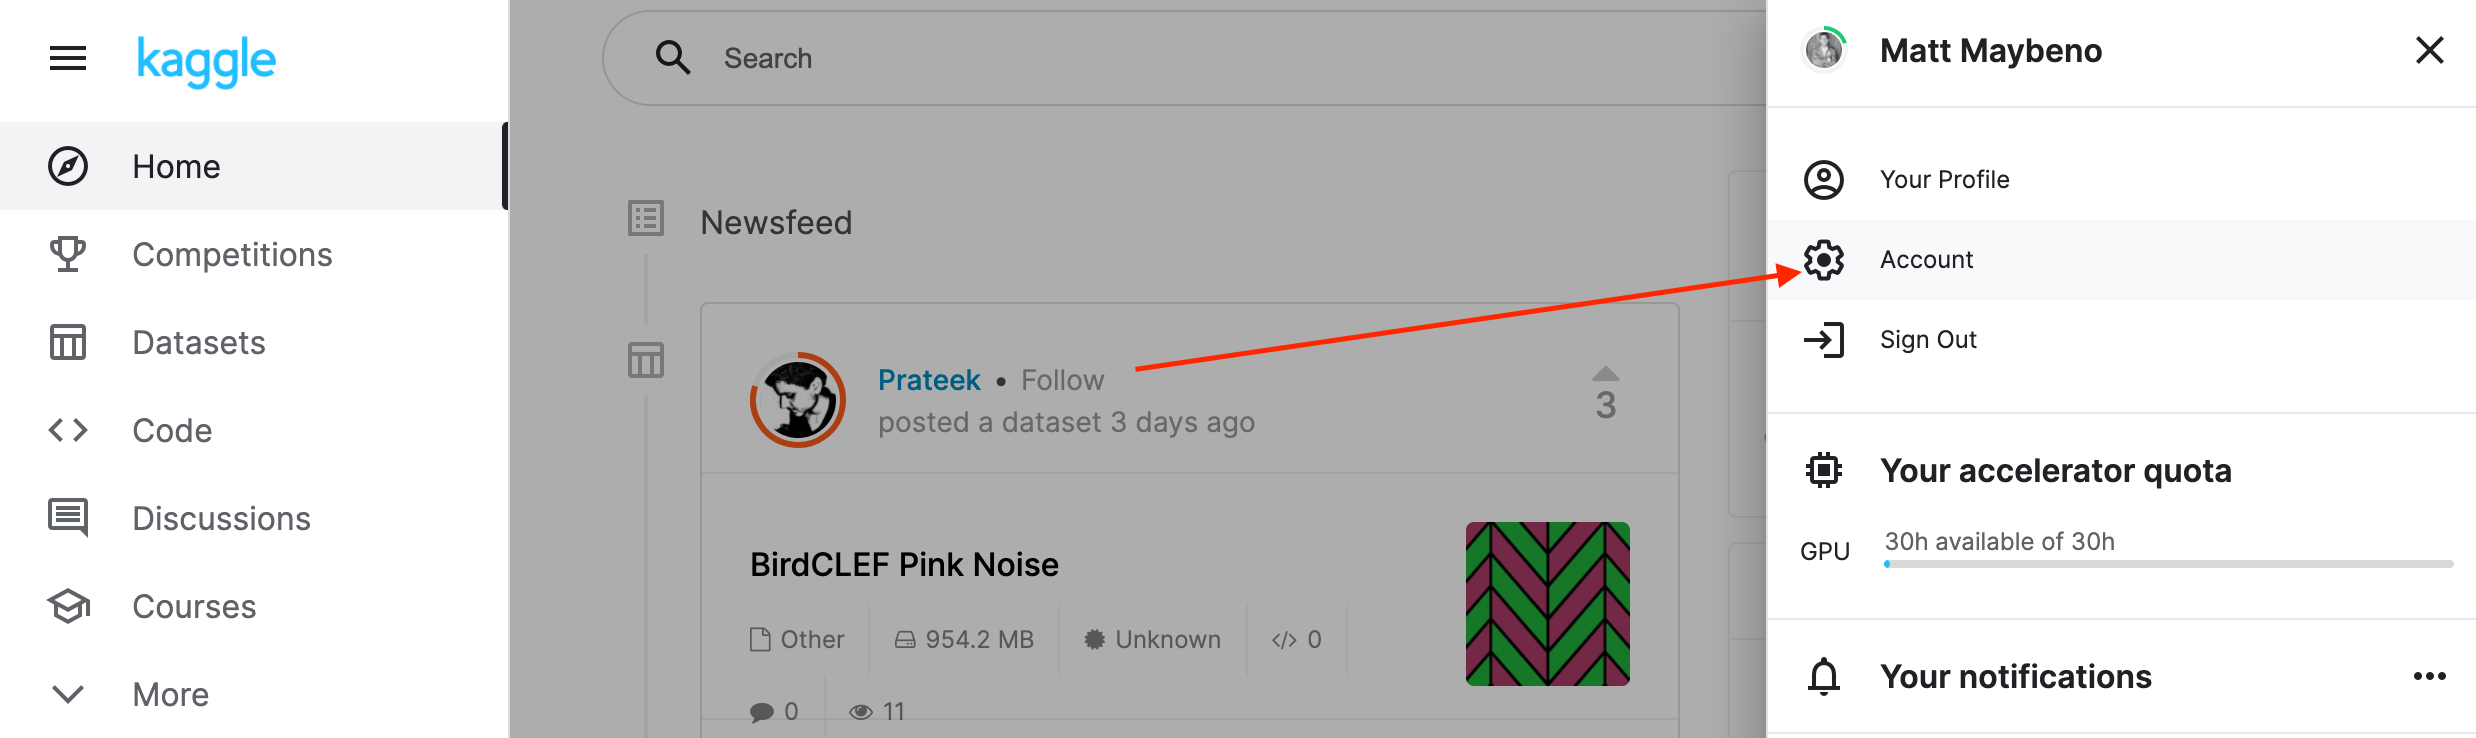
2. Scroll down to API and click Create New API Token.
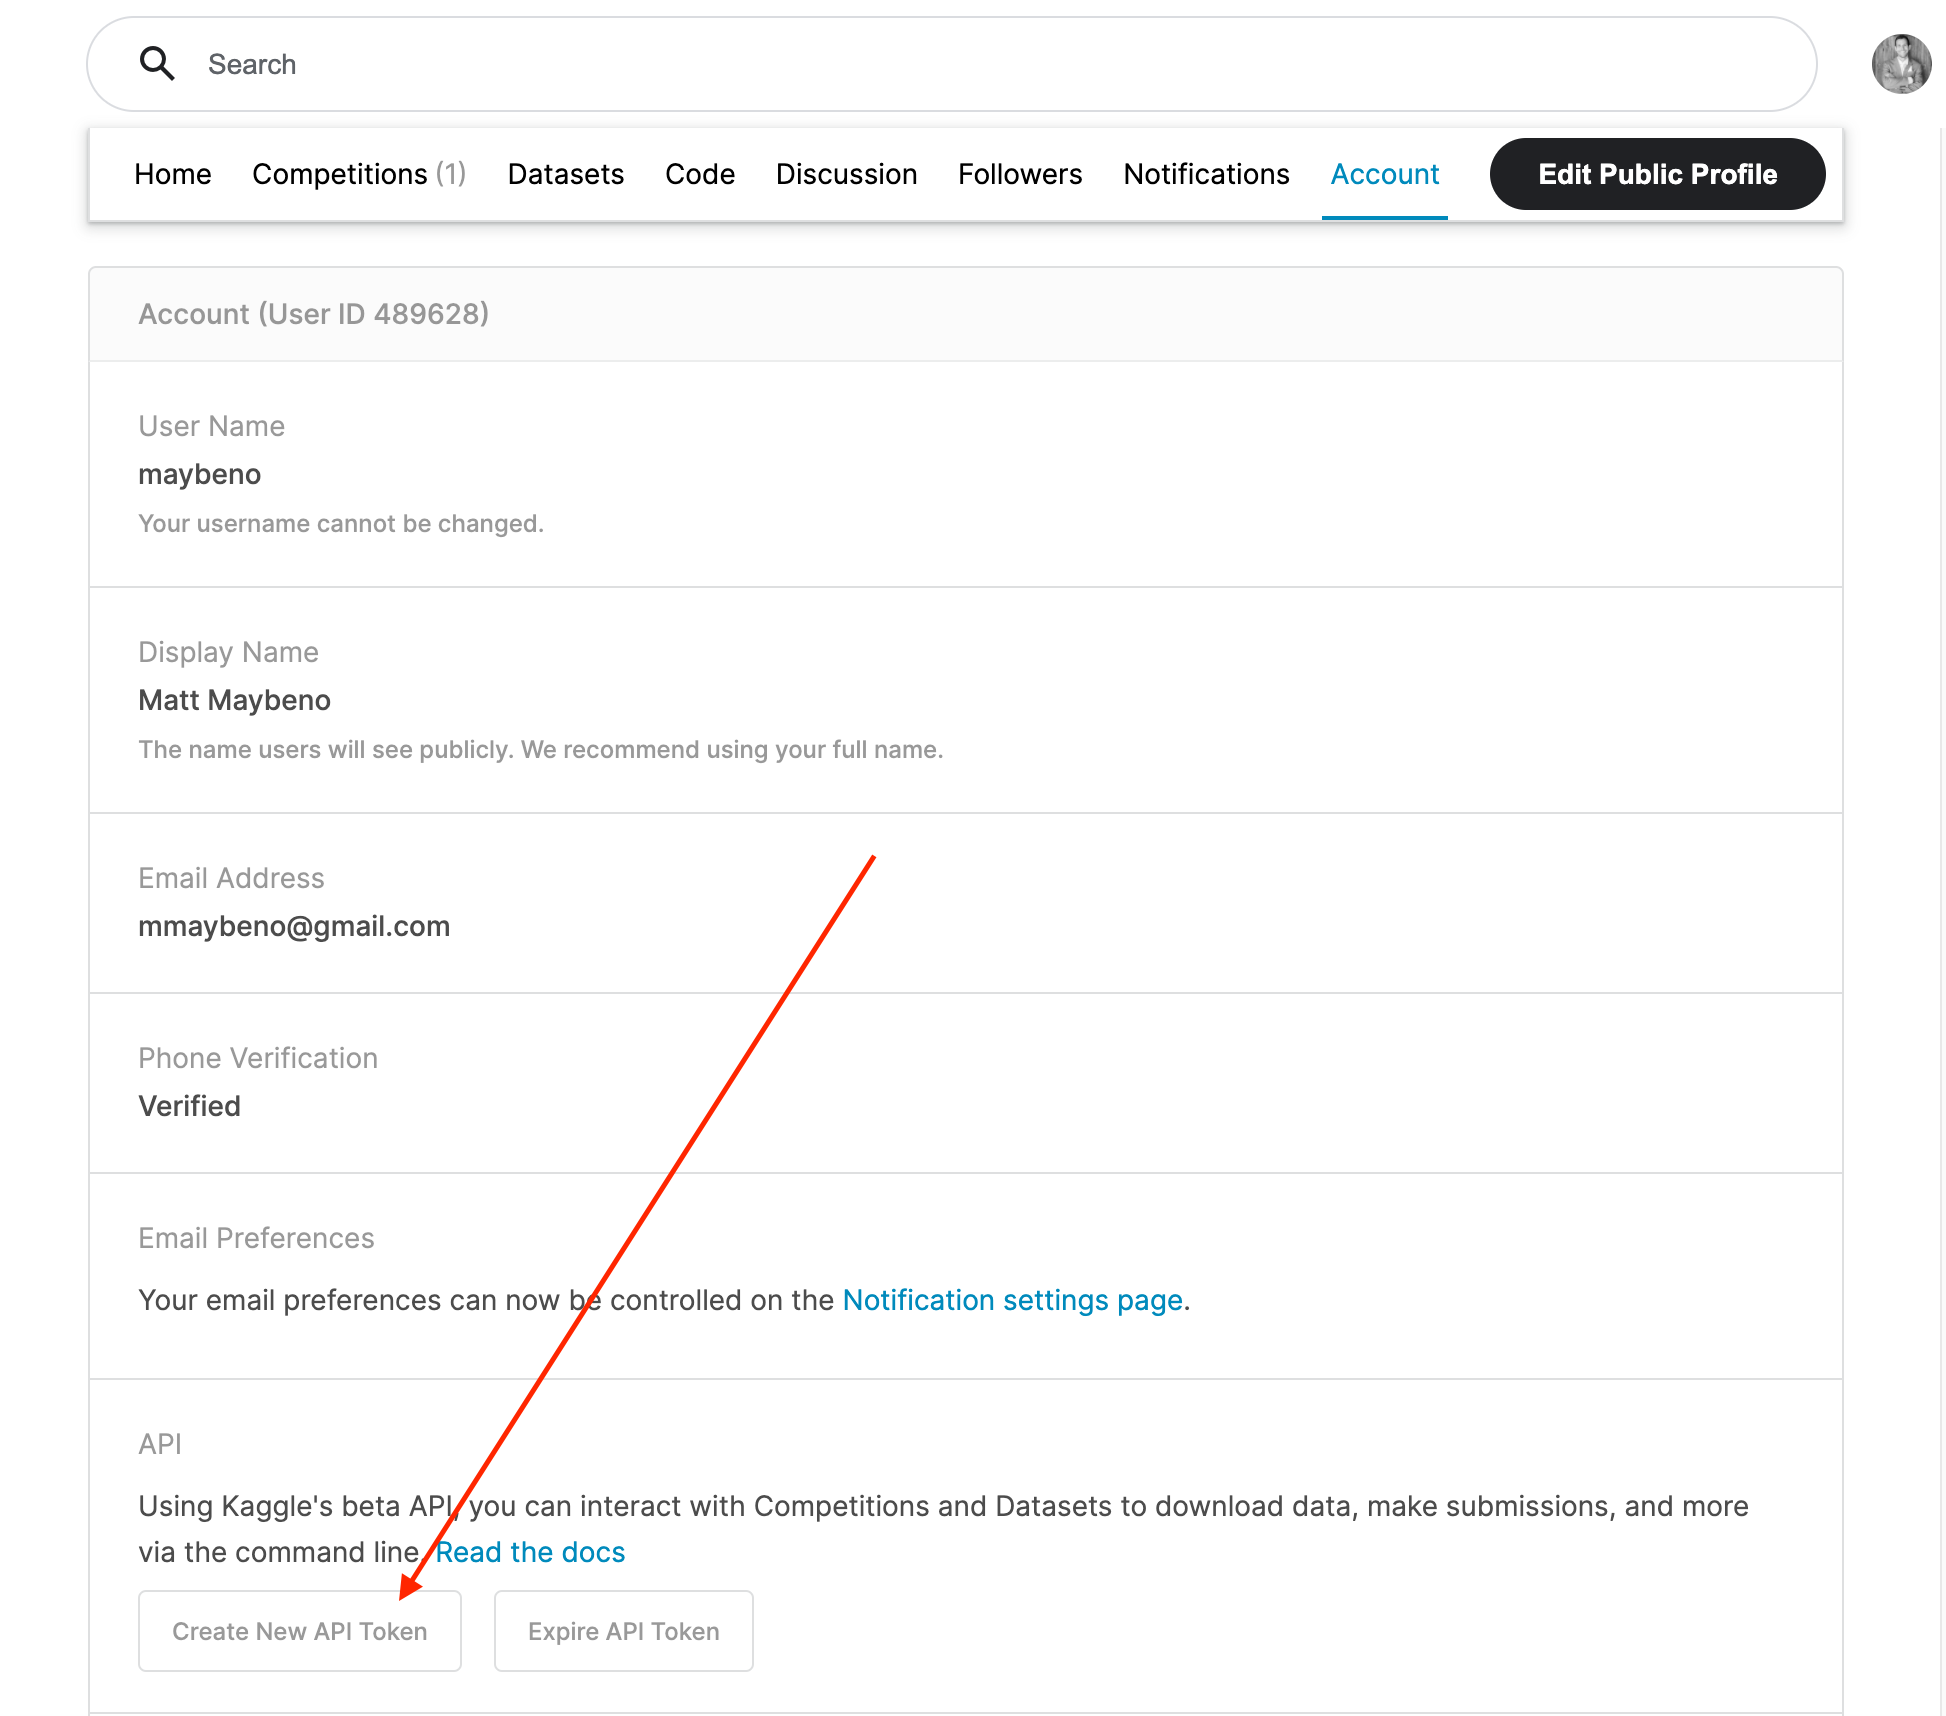
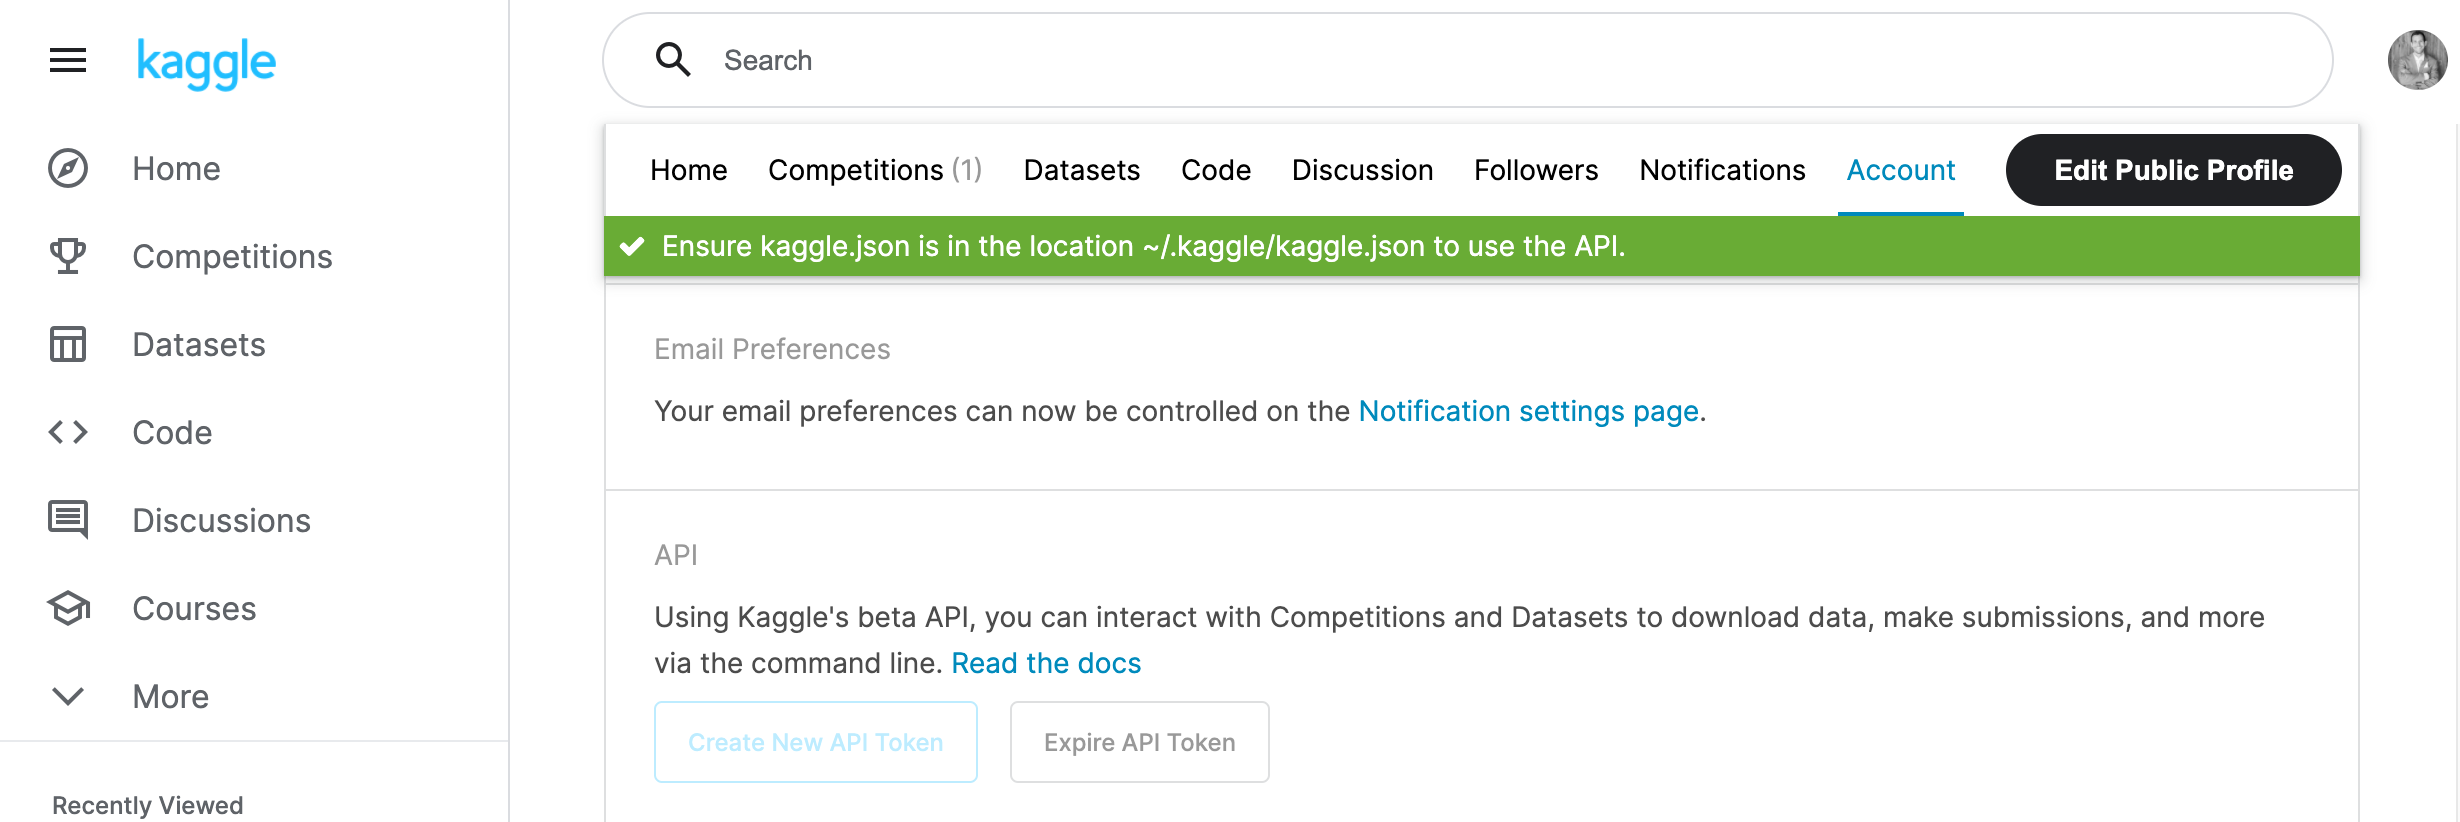
3. Open up `kaggle.json` and use the username and key.
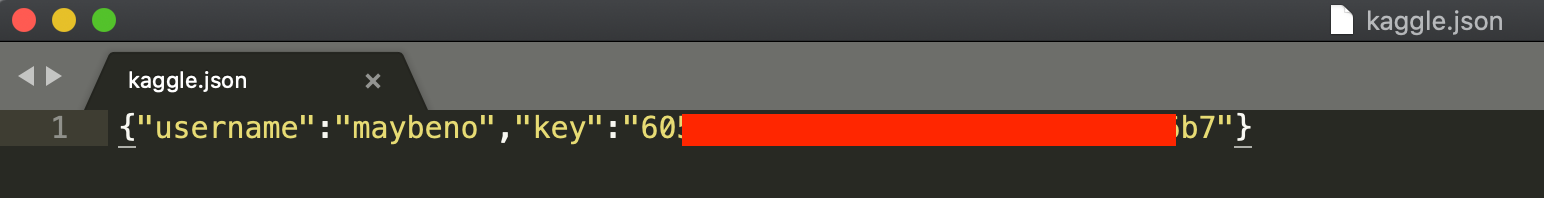

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [ ]:
# !pip install -U pip
# !pip install -U setuptools wheel
# !pip install -U "mxnet<2.0.0" bokeh==2.0.1
# !pip install autogluon --no-cache-dir
# # Without --no-cache-dir, smaller aws instances may have trouble installing

### Setup Kaggle API Key

In [5]:
# # # create the .kaggle directory and an empty kaggle.json file
# !mkdir /home/.kaggle
# !touch /home/.kaggle/kaggle.json
# !chmod 600 /home/.kaggle/kaggle.json

In [6]:
# # Fill in your user name and key from creating the kaggle account and API token file
# import json
# kaggle_username = "markawuku"
# kaggle_key = "56c7b691f3fdb5cf000b08b0c55fde75"

# # Save API token the kaggle.json file
# with open("/root/.kaggle/kaggle.json", "w") as f:
#     f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
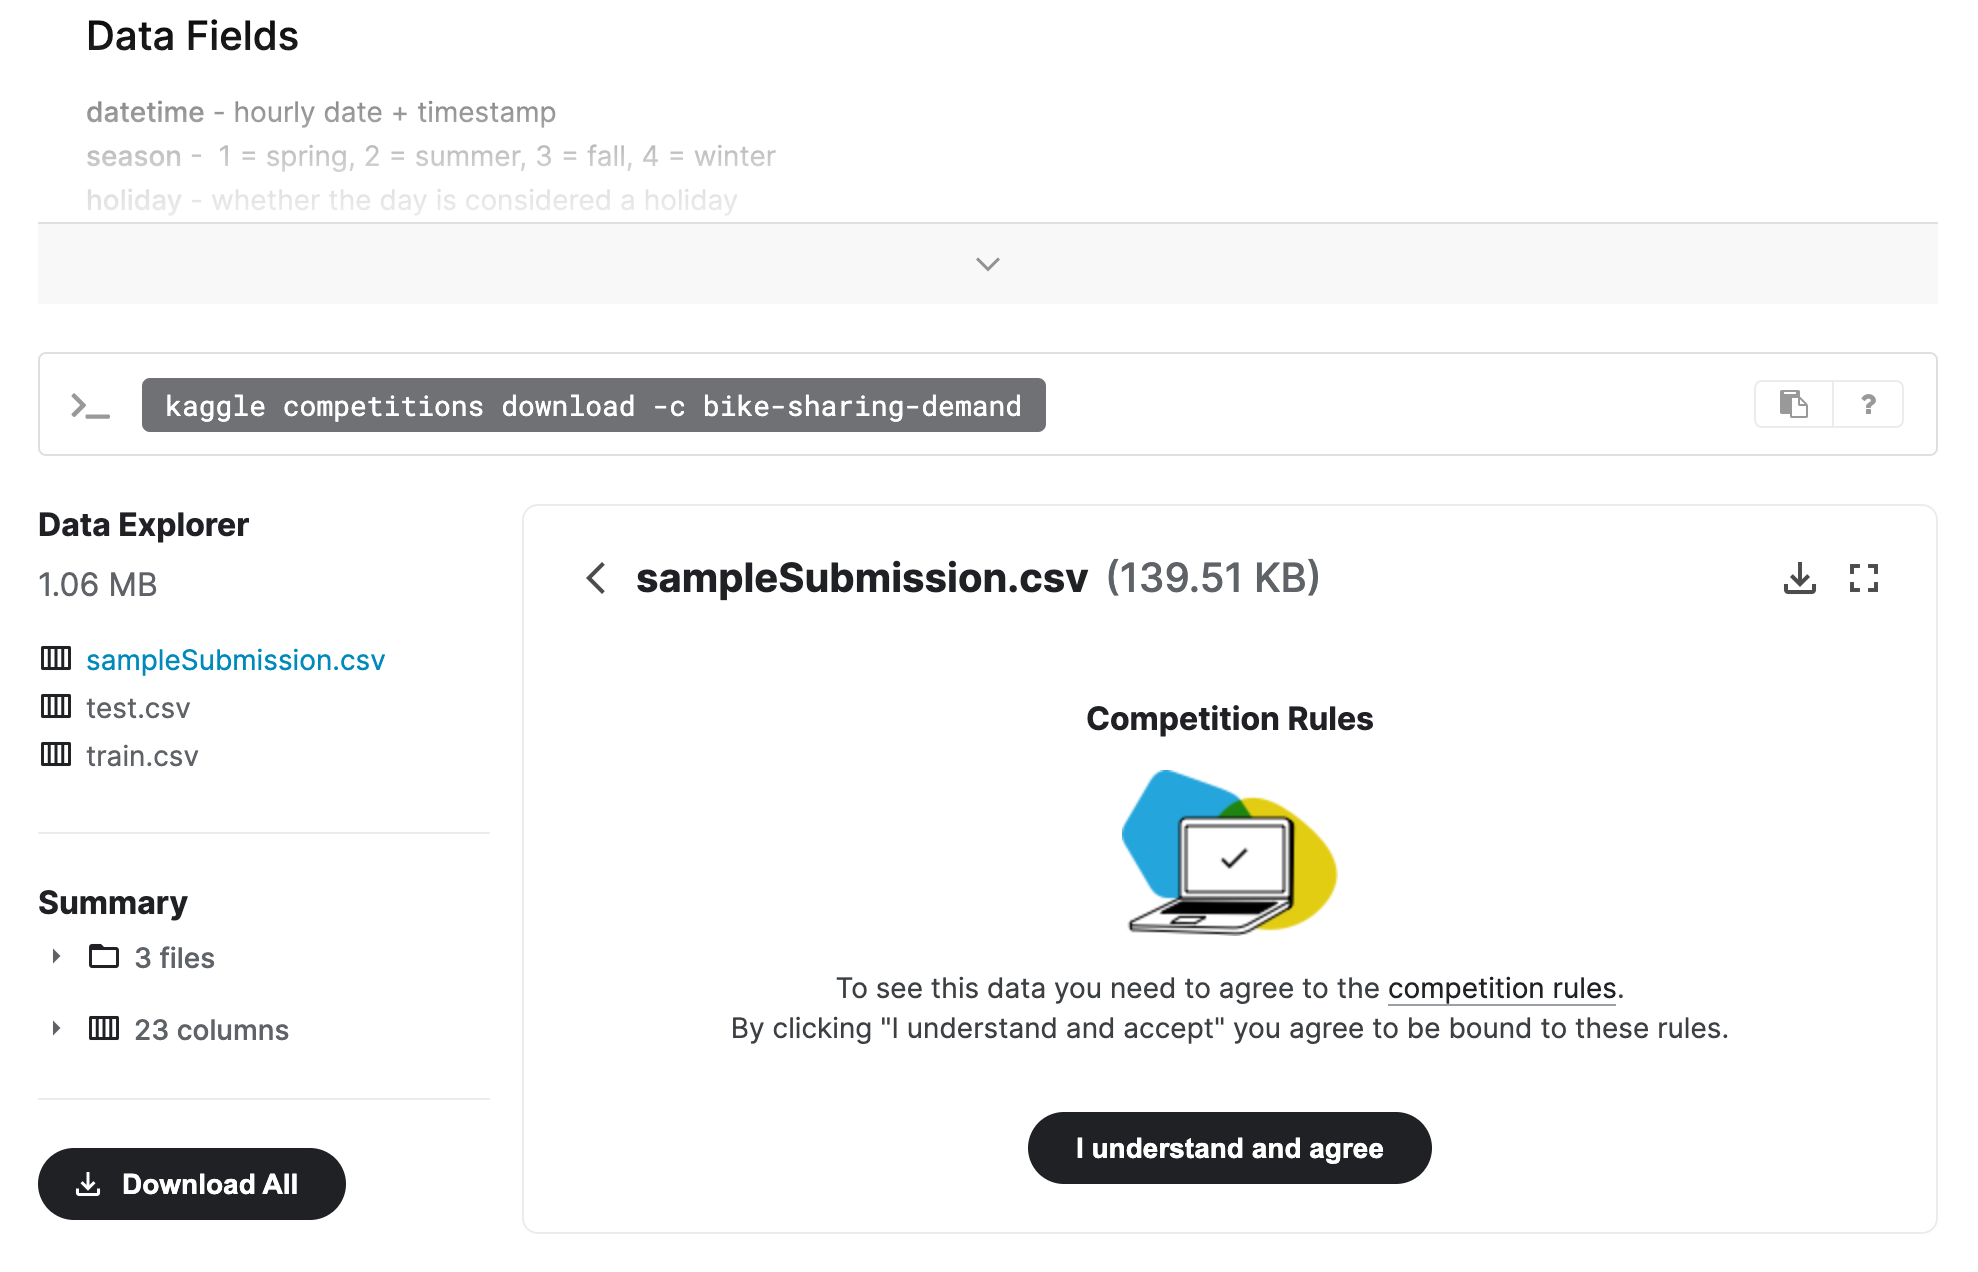

In [ ]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
# !kaggle competitions download -c bike-sharing-demand

# If you already downloaded it you can use the -o command to overwrite the file
# !unzip -o bike-sharing-demand.zip

In [1]:
import pandas as pd
from autogluon.tabular import TabularPredictor
import autogluon.core as ag

In [8]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv('data/train.csv', parse_dates=['datetime'])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [9]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.

In [10]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv('data/test.csv', parse_dates=['datetime'])
test.head()
# test.shape

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [11]:
# Same thing as train and test dataset
submission = pd.read_csv('data/sampleSubmission.csv', parse_dates=['datetime'])
submission.head()
# submission.shape

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [12]:
# casual and registered columns to remmove/ignored
ignore_cols = ['casual','registered']
train.drop(ignore_cols, axis=1, inplace=True)  # using the ignored_colums kwargs of TabularPredictor 

target = 'count'
metric = 'root_mean_squared_error'
ttime = 10 * 60 # train various models for 10 minutes, 10 x 60 seconds
train.info() # confirm if casual and registered columns are remmoved - manual drop

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(6)
memory usage: 850.6 KB


In [15]:
# to ignore columns of train data in fit, kwargs 'ignored_columns' of TabularPredictor
# throw ValueError: Invalid kwargs passed: ['ignored_columns']
predictor = TabularPredictor(label=target, eval_metric=metric).fit(
    train_data=train,
    time_limit=ttime,
    presets='best_quality'
)

No path specified. Models will be saved in: "AutogluonModels/ag-20221209_105430/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20221209_105430/"
AutoGluon Version:  0.6.0
Python Version:     3.8.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #62-Ubuntu SMP Tue Nov 22 19:54:14 UTC 2022
Train Data Rows:    10886
Train Data Columns: 9
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
U

### Review AutoGluon's training run with ranking of models that did the best.

In [16]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -51.016775      23.957408  435.465357                0.000576           0.430073            3       True         17
1   NeuralNetFastAI_BAG_L2  -52.316510      22.873285  411.570839                0.594260          50.873035            2       True         16
2   RandomForestMSE_BAG_L2  -53.328131      22.836918  378.574327                0.557894          17.876523            2       True         13
3     ExtraTreesMSE_BAG_L2  -53.810690      22.804677  366.285727                0.525653           5.587923            2       True         15
4          LightGBM_BAG_L2  -54.926250      22.854818  376.051132                0.575794          15.353328            2       True         12
5          CatBoost_BAG_L2  -55.443154      22.368099  411.644937         

/home/marc/miniconda3/envs/mlspace/lib/python3.8/site-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'NeuralNetTorch_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BA

### Create predictions from test dataset

In [17]:
# evalauation = predictor.evaluate(test)
predictions = predictor.predict(test)
predictions.head()

0    25.308819
1    40.510307
2    44.582821
3    48.125732
4    50.569756
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [18]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      100.010139
std        87.707001
min         0.600776
25%        22.883436
50%        67.579788
75%       165.780243
max       349.628387
Name: count, dtype: float64

In [20]:
# How many negative values do we have?
# (df[df<0]).sum().sum()
neg_values = (predictions[predictions < 0]).sum().sum()
print('Number of negative values: ', neg_values)


Number of negative values:  0.0


In [21]:
# Set them to zero
# df[df < 0] = 0
predictions[predictions < 0] = 0

### Set predictions to submission dataframe, save, and submit

In [22]:
submission["count"] = predictions
submission.to_csv("LOCAL_submission.csv", index=False)

In [58]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100%|████████████████████████████████████████| 188k/188k [00:02<00:00, 94.0kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [63]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

# !kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                           date                 description                       status    publicScore  privateScore  
---------------------------------  -------------------  --------------------------------  --------  -----------  ------------  
submission.csv                     2022-12-09 12:57:55  first raw submission              complete  1.79082      1.79082       
LOCAL_submission.csv               2022-12-09 12:57:02  first raw submission              complete  1.77321      1.77321       
LOCAL_submission_new_features.csv  2022-12-09 12:13:06  Feature engineered original data  complete  0.72416      0.72416       
LOCAL_submission.csv               2022-12-09 12:12:21  Original data                     complete  1.77321      1.77321       


#### Initial score of `1.77321`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<AxesSubplot:title={'center':'datetime'}>,
        <AxesSubplot:title={'center':'season'}>,
        <AxesSubplot:title={'center':'holiday'}>],
       [<AxesSubplot:title={'center':'workingday'}>,
        <AxesSubplot:title={'center':'weather'}>,
        <AxesSubplot:title={'center':'temp'}>],
       [<AxesSubplot:title={'center':'atemp'}>,
        <AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'windspeed'}>],
       [<AxesSubplot:title={'center':'count'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

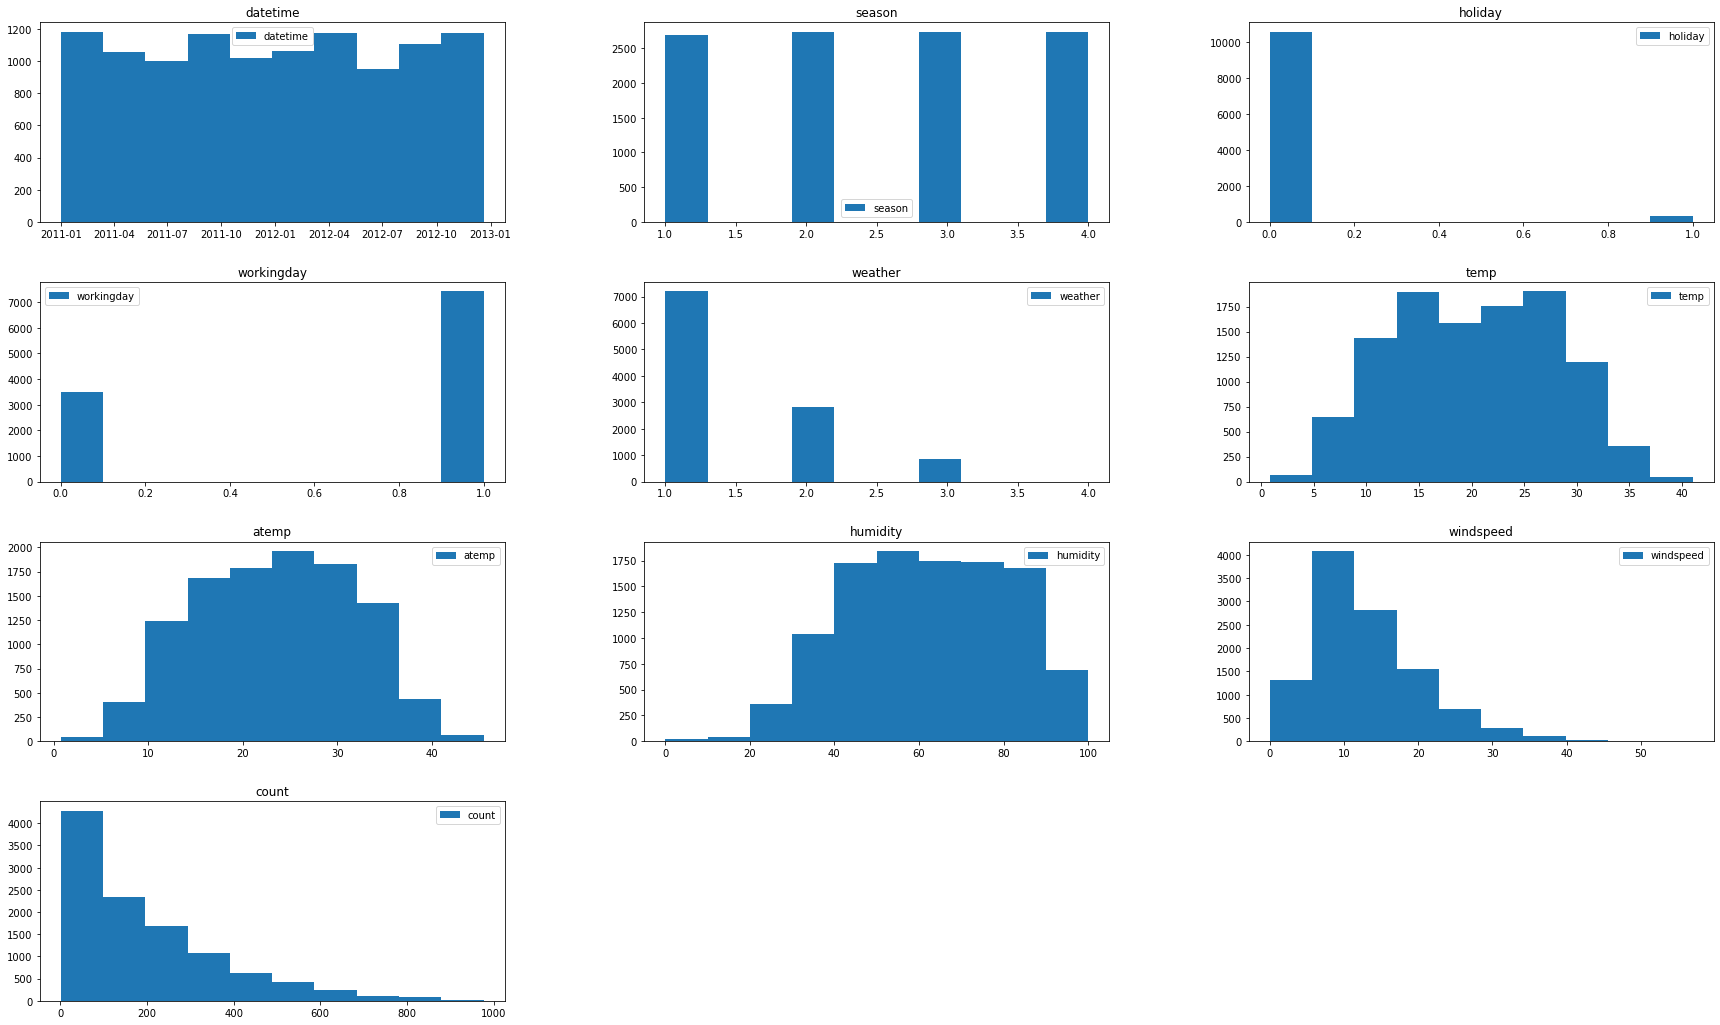

In [25]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist(figsize=(30,18), legend=True, grid=False)

In [28]:
train.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.101369
count,0.163439,-0.005393,0.011594,-0.128655,0.394454,0.389784,-0.317371,0.101369,1.000000


<AxesSubplot:>

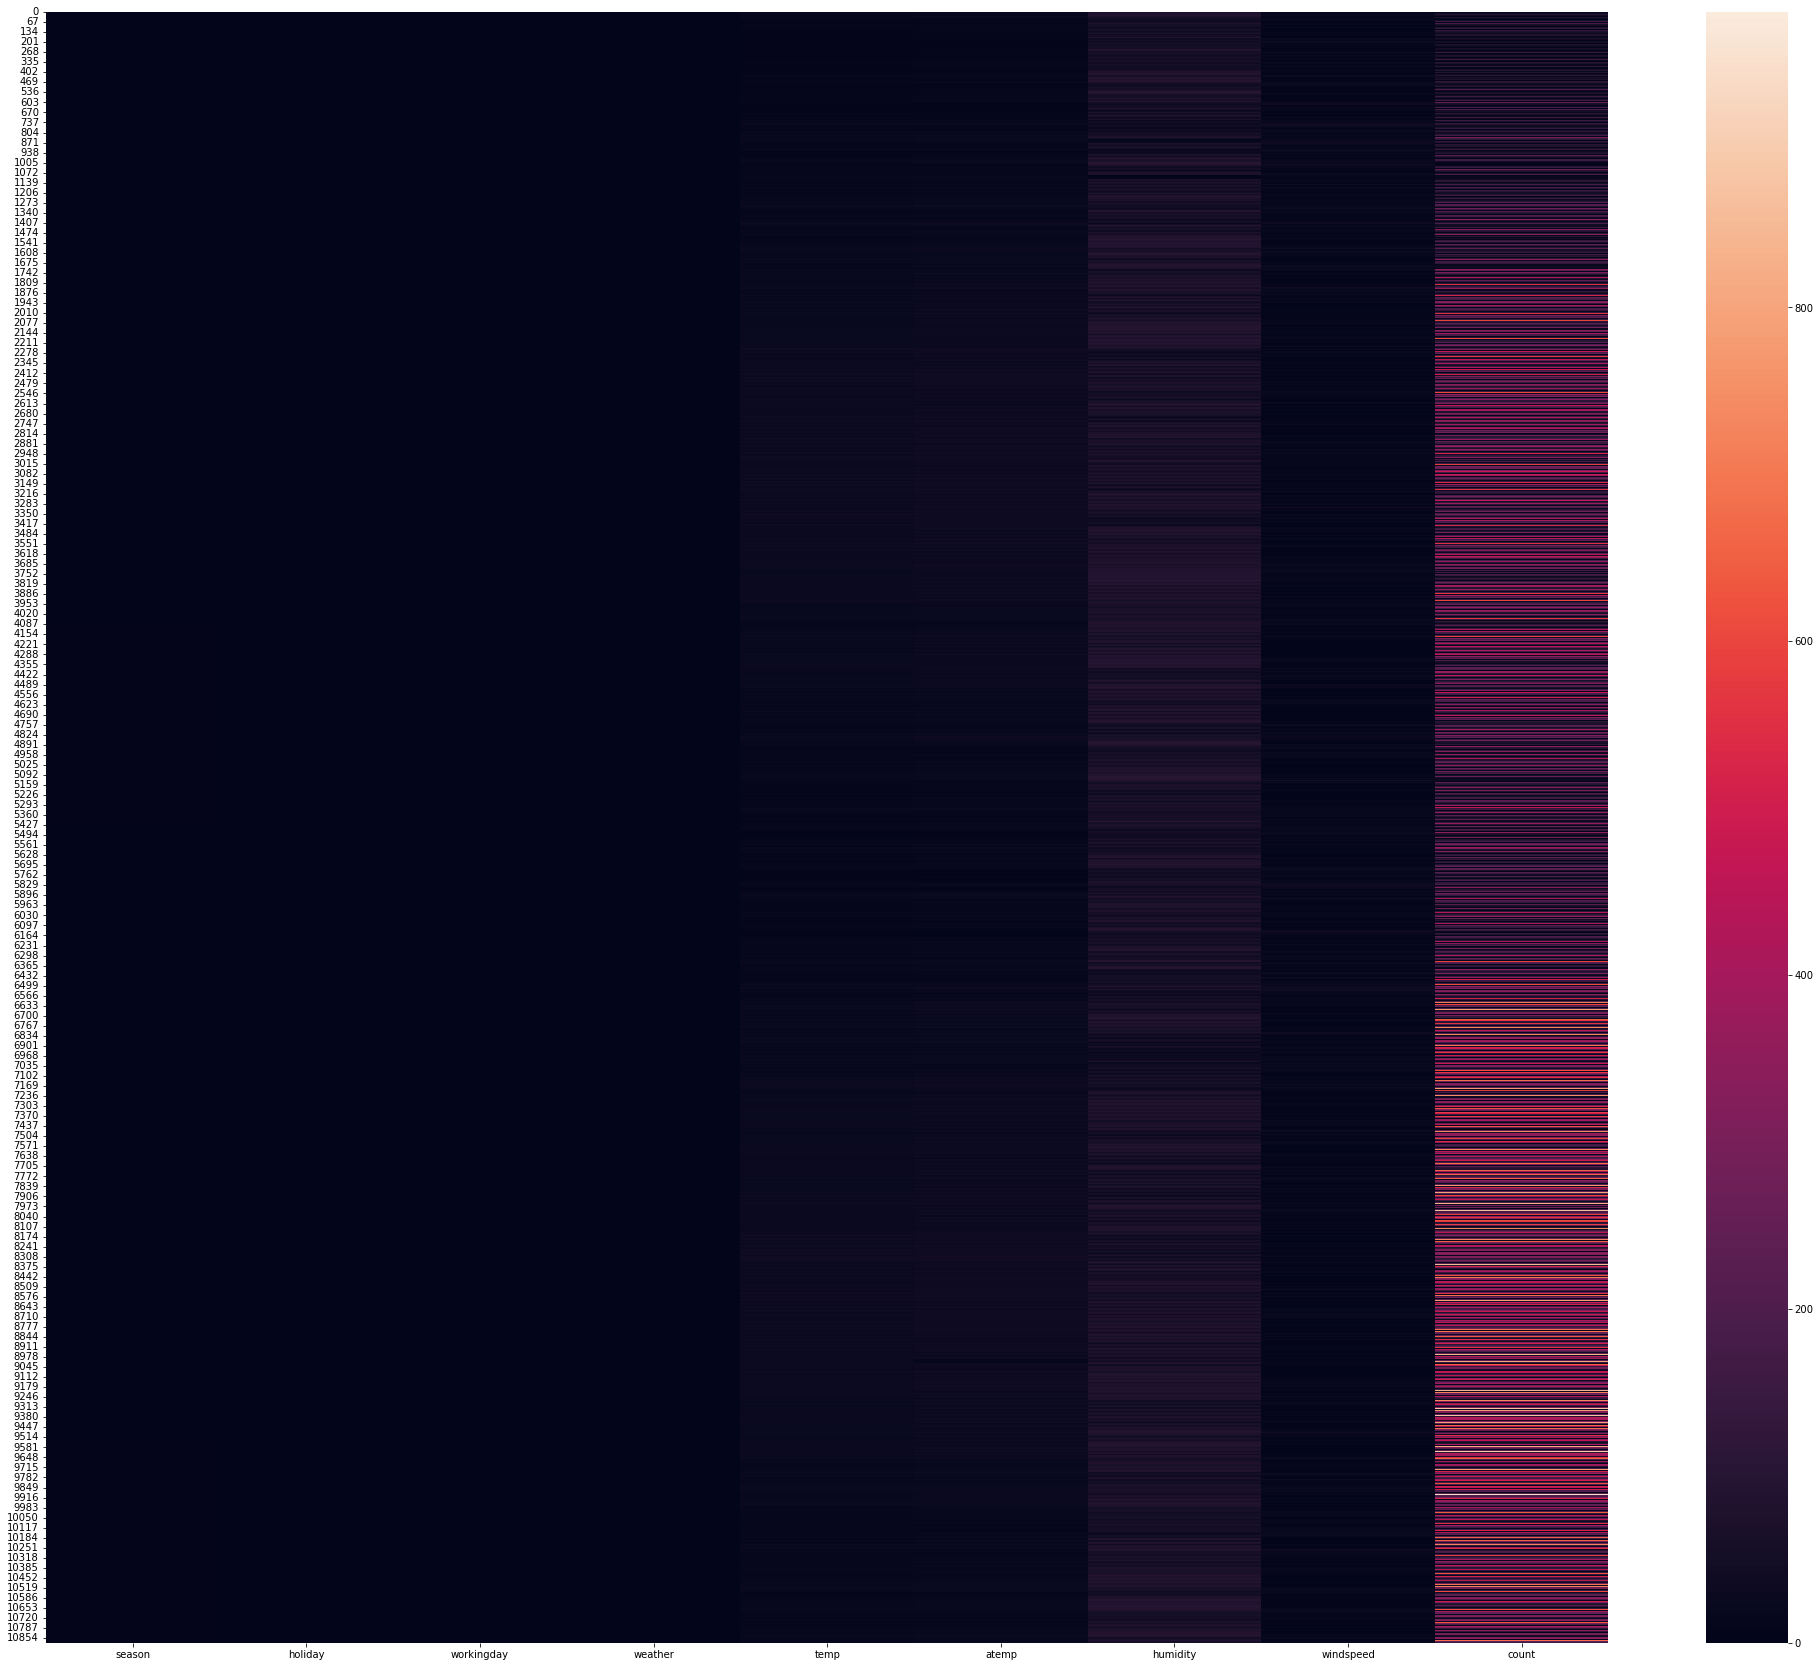

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

remove_time = train.drop('datetime', axis=1)

fig, ax = plt.subplots(figsize=(35,30))
sns.heatmap(remove_time, annot = False, ax=ax)

In [69]:
# create a new feature
train['hour'] = train['datetime'].dt.hour
train['day'] = train['datetime'].dt.day
train['month'] = train['datetime'].dt.month
train['year'] = train['datetime'].dt.year



test['hour'] = test['datetime'].dt.hour
test['day'] = test['datetime'].dt.day
test['month'] = test['datetime'].dt.month
test['year'] = test['datetime'].dt.year

train.head(20)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,day,month,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,16,0,1,1,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,40,1,1,1,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,32,2,1,1,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,13,3,1,1,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,4,1,1,2011
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,1,5,1,1,2011
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,6,1,1,2011
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,3,7,1,1,2011
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,8,8,1,1,2011
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,14,9,1,1,2011


## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [48]:
train["season"] = train['season'].astype('category')
train["weather"] = train['weather'].astype('category')

test["season"] = test['season'].astype('category')
test["weather"] = test['weather'].astype('category')

                                         
train.info()                                         

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   count       10886 non-null  int64         
 10  hour        10886 non-null  int64         
 11  day         10886 non-null  int64         
 12  month       10886 non-null  int64         
 13  year        10886 non-null  int64         
dtypes: category(2), datetime64[ns](1), float64(3), int64(8)
memory usage: 1.0 MB


In [49]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,day,month,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,0,1,1,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,1,1,1,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,2,1,1,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,3,1,1,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,4,1,1,2011


array([[<AxesSubplot:title={'center':'datetime'}>,
        <AxesSubplot:title={'center':'holiday'}>,
        <AxesSubplot:title={'center':'workingday'}>],
       [<AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'atemp'}>,
        <AxesSubplot:title={'center':'humidity'}>],
       [<AxesSubplot:title={'center':'windspeed'}>,
        <AxesSubplot:title={'center':'count'}>,
        <AxesSubplot:title={'center':'hour'}>],
       [<AxesSubplot:title={'center':'day'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'year'}>]], dtype=object)

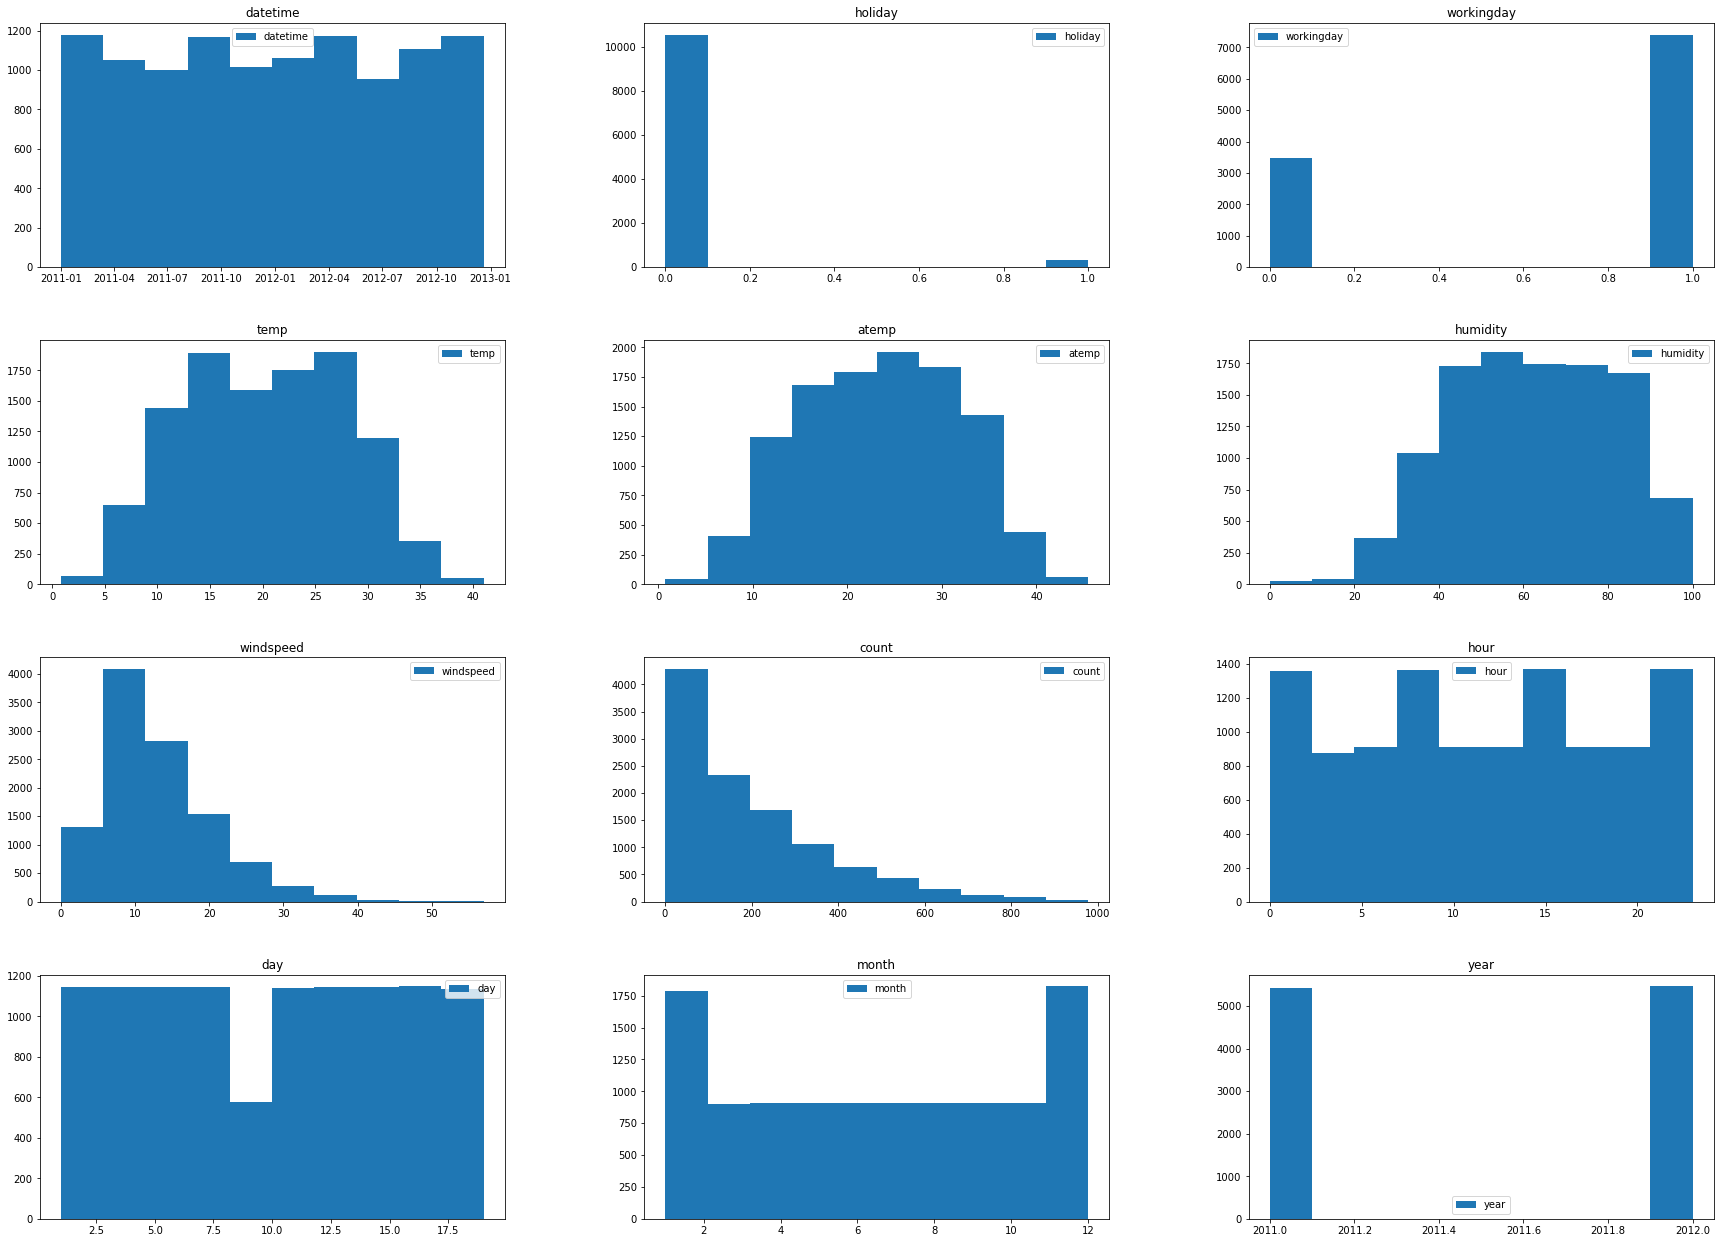

In [50]:
# View histogram of all features again now with the hour feature
train.hist(figsize=(30,22), legend=True, grid=False)

## Step 5: Rerun the model with the same settings as before, just with more features

In [51]:
predictor_new_features = TabularPredictor(label=target, eval_metric = metric).fit(
    train_data = train,    
    time_limit = ttime,    
    presets = 'best_quality'
)

No path specified. Models will be saved in: "AutogluonModels/ag-20221209_114928/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20221209_114928/"
AutoGluon Version:  0.6.0
Python Version:     3.8.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #62-Ubuntu SMP Tue Nov 22 19:54:14 UTC 2022
Train Data Rows:    10886
Train Data Columns: 13
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])


In [52]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -30.188990      31.104913  536.132095                0.001255           0.619649            3       True         16
1          CatBoost_BAG_L2  -30.373700      28.669493  480.061351                0.125973          98.169056            2       True         13
2          LightGBM_BAG_L2  -30.701402      28.896840  396.823680                0.353320          14.931385            2       True         11
3        LightGBMXT_BAG_L2  -31.317951      30.022053  403.063027                1.478532          21.170732            2       True         10
4     ExtraTreesMSE_BAG_L2  -31.534814      29.113507  388.129306                0.569986           6.237011            2       True         14
5   RandomForestMSE_BAG_L2  -31.780445      29.172448  401.754465         

/home/marc/miniconda3/envs/mlspace/lib/python3.8/site-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602

In [53]:
# predicting with new features
new_feat_predictions = predictor_new_features.predict(test)
new_feat_predictions.head()

0    16.994888
1    11.563103
2    11.249135
3     9.966819
4     8.709257
Name: count, dtype: float32

In [54]:
# Same submitting predictions
submission_new_features = pd.read_csv('data/sampleSubmission.csv', parse_dates=['datetime'])

# replace counts with new predictions
submission_new_features["count"] = new_feat_predictions
submission_new_features.to_csv("LOCAL_submission_new_features.csv", index=False)

In [65]:
!kaggle competitions submit -c bike-sharing-demand -f LOCAL_submission_new_features.csv -m "new features"

100%|████████████████████████████████████████| 188k/188k [00:02<00:00, 87.7kB/s]
Successfully submitted to Bike Sharing Demand

In [66]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                           date                 description                       status    publicScore  privateScore  
---------------------------------  -------------------  --------------------------------  --------  -----------  ------------  
LOCAL_submission_new_features.csv  2022-12-09 13:01:23  new features                      complete  0.72416      0.72416       
submission.csv                     2022-12-09 12:57:55  first raw submission              complete  1.79082      1.79082       
LOCAL_submission.csv               2022-12-09 12:57:02  first raw submission              complete  1.77321      1.77321       
LOCAL_submission_new_features.csv  2022-12-09 12:13:06  Feature engineered original data  complete  0.72416      0.72416       


#### New Score of `0.72416`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

### Step 6a: AutoGluon high level paramter set to `light`
`light`: Results in smaller models. Generally will make inference speed much faster and disk usage much lower, but with worse accuracy

In [70]:

predictor_light_hpo = TabularPredictor(label=target, eval_metric = metric).fit(
    train_data = train,    
    time_limit = ttime,    
    presets = 'best_quality',
    hyperparameters='light'
)

No path specified. Models will be saved in: "AutogluonModels/ag-20221209_151049/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20221209_151049/"
AutoGluon Version:  0.6.0
Python Version:     3.8.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #62-Ubuntu SMP Tue Nov 22 19:54:14 UTC 2022
Train Data Rows:    10886
Train Data Columns: 13
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])


In [71]:
predictor_light_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                    model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0     WeightedEnsemble_L3 -37.163054       1.887162  25.038127                0.000955           0.246941            3       True          6
1    ExtraTreesMSE_BAG_L2 -37.197515       1.448957  15.050075                0.421816           3.386945            2       True          5
2  RandomForestMSE_BAG_L2 -37.692463       1.464391  21.404241                0.437250           9.741111            2       True          4
3     WeightedEnsemble_L2 -37.872632       1.028185  11.941190                0.001044           0.278060            2       True          3
4  RandomForestMSE_BAG_L1 -38.851313       0.448022   7.143000                0.448022           7.143000            1       True          1
5    ExtraTreesMSE_BAG_L1 -39.460168       0.579119   4.520130                0.579119      

/home/marc/miniconda3/envs/mlspace/lib/python3.8/site-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'RandomForestMSE_BAG_L1': -38.85131301384716,
  'ExtraTreesMSE_BAG_L1': -39.460167894867,
  'WeightedEnsemble_L2': -37.87263160145575,
  'RandomForestMSE_BAG_L2': -37.69246346179202,
  'ExtraTreesMSE_BAG_L2': -37.19751545301262,
  'WeightedEnsemble_L3': -37.163054163190324},
 'model_best': 'WeightedEnsemble_L3',
 'model_paths': {'RandomForestMSE_BAG_L1': 'AutogluonModels/ag-20221209_151049/models/RandomForestMSE_BAG_L1/',
  'ExtraTreesMSE_BAG_L1': 'AutogluonModels/ag-20221209_151049/models/ExtraTreesMSE_BAG_L1/',
  'WeightedEnsemble_L2': 'AutogluonModels/ag-20221209_151049/models/WeightedEnsemble_L2/',
  'RandomForestMSE_BAG_L2': 'Autogl

In [72]:
# Remember to set all negative values to zero

predictions_light_hpo = predictor_light_hpo.predict(test)
predictions_light_hpo.head()


0    12.153753
1     5.720111
2     4.759970
3     2.787026
4     2.663867
Name: count, dtype: float32

In [73]:
predictions_light_hpo.describe()

count    6493.000000
mean      193.862885
std       174.573135
min         2.430819
25%        48.451729
50%       149.758057
75%       283.056183
max       921.793884
Name: count, dtype: float64

In [74]:
neg_val_light_hpo = (predictions_light_hpo[predictions_light_hpo < 0]).sum().sum()
print('Number of negative values: ', neg_val_light_hpo)

Number of negative values:  0.0


In [77]:
# Same submitting predictions
submission_light_hpo = pd.read_csv('data/sampleSubmission.csv', parse_dates=['datetime'])

submission_light_hpo["count"] = predictions_light_hpo
submission_light_hpo.to_csv("LOCAL_submission_new_light_hpo.csv", index=False)

In [78]:
!kaggle competitions submit -c bike-sharing-demand -f LOCAL_submission_new_light_hpo.csv -m "new features with 'light' hyperparameters"

100%|████████████████████████████████████████| 188k/188k [00:02<00:00, 83.8kB/s]
Successfully submitted to Bike Sharing Demand

In [79]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                            date                 description                                status    publicScore  privateScore  
----------------------------------  -------------------  -----------------------------------------  --------  -----------  ------------  
LOCAL_submission_new_light_hpo.csv  2022-12-09 15:24:42  new features with 'light' hyperparameters  complete  0.47104      0.47104       
LOCAL_submission_new_features.csv   2022-12-09 13:01:23  new features                               complete  0.72416      0.72416       
submission.csv                      2022-12-09 12:57:55  first raw submission                       complete  1.79082      1.79082       
LOCAL_submission.csv                2022-12-09 12:57:02  first raw submission                       complete  1.77321      1.77321       


#### New Score of `0.47104`

### Step 6b: AutoGluon low level hyperparameter tuning raw data


In [17]:
train_init = pd.read_csv('data/train.csv', parse_dates=['datetime'])
test_init = pd.read_csv('data/test.csv', parse_dates=['datetime'])
submission_init = pd.read_csv('data/sampleSubmission.csv', parse_dates=['datetime'])

ignore_cols = ['casual','registered']
train_init.drop(ignore_cols, axis=1, inplace=True)  # using the ignored_colums kwargs of TabularPredictor 

target = 'count'
metric = 'root_mean_squared_error'
ttime = 10 * 60 # train various models for 10 minutes, 10 x 60 seconds
train_init.info() # confirm if casual and registered columns are remmoved - manual drop


# setting up individual hyper-parameters for each algorithm
# https://lightgbm.readthedocs.io/en/latest/Parameters.html
gbm_options = {
    # 'num_boost_round': 500,
    'num_leaves': ag.space.Int(lower=100, upper=500, default=250),
    # 'tree_learner': 'feature',  #  serial, feature, data, voting
}


# https://catboost.ai/docs/concepts/parameter-tuning.html
cat_options = {
    'iterations':  ag.space.Int(200, 500, default=250),
    # 'depth': ag.space.Int(4, 10, default=6),
    # 'random_strength': ag.space.Int(0, 20, default=7),
}


# https://xgboost.readthedocs.io/en/latest/parameter.html
xgb_options = { # empyt dict uses default params
}


nueral_net_option = {
    # 'num_epochs': 200,
    'learning_rate': ag.space.Real(1e-4, 1e-1, default=5e-4, log=True),
    'dropout_prob': ag.space.Real(0.01, 0.6, default=0.1),
    # 'activation': ag.space.Categorical('relu', 'softrelu', 'tanh'),
}


# hyperparamter for each model
# {} uses autogluon default presets
hyperparameters = {
    'GBM': gbm_options,
    'CAT': cat_options,
    'NN_TORCH': nueral_net_option,
    'XGB': xgb_options,
    'RF': {},
    'FASTAI': {}
}


hyperparameter_tune_kwargs = {
    'num_trials': 10,
    'searcher': 'auto',  # auto random, bayesopt
    'scheduler': 'local', 
}



predictor_init = TabularPredictor(label=target, eval_metric=metric).fit(
    train_data = train_init,
    time_limit = ttime,
    presets = 'best_quality',
    hyperparameters = hyperparameters,
    hyperparameter_tune_kwargs = hyperparameter_tune_kwargs   
)


predictor_init.fit_summary()


init_predictions = predictor_init.predict(test_init)
init_predictions.head()


init_predictions[init_predictions < 0] = 0


submission_init["count"] = init_predictions
submission_init.to_csv("init_preds/INIT_submission.csv", index=False)


!kaggle competitions submit -c bike-sharing-demand -f init_preds/INIT_submission.csv -m "Init raw submission"
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

2022-12-12 00:24:47,215	ERROR worker.py:399 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
Fitted model: NeuralNetTorch_BAG_L2/622f19ac ...
	-117.0802	 = Validation score   (-root_mean_squared_error)
	42.96s	 = Training   runtime
	0.0s	 = Validation runtime
Completed 1/20 k-fold bagging repeats ...
Fitting model: WeightedEnsemble_L3 ... Training model for up to 360.0s of the 71.06s of remaining time.
	-114.5989	 = Validation score   (-root_mean_squared_error)
	0.61s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 529.59s ... Best model: "WeightedEnsemble_L3"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20221212_001647/")
/home/marc/miniconda3/envs/mlspace/lib/python3.8/site-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot

*** Summary of fit() ***
Estimated performance of each model:
                              model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0               WeightedEnsemble_L3 -114.598932       0.002511  360.852844                0.000637           0.614912            3       True         15
1                CatBoost_BAG_L2/T1 -114.981646       0.001361  246.949631                0.000149          19.249399            2       True         12
2                CatBoost_BAG_L2/T2 -115.082768       0.001346  245.395966                0.000135          17.695734            2       True         13
3               WeightedEnsemble_L2 -116.546030       0.001878   63.844220                0.001655           1.065046            2       True          9
4               RandomForest_BAG_L1 -116.548359       0.000119    8.047319                0.000119           8.047319            1       True          3
5    NeuralNetTorch_

### Step 6c: AutoGluon low level hyperparameter tuning using new features


In [20]:

train_feat = pd.read_csv('data/train.csv', parse_dates=['datetime'])
test_feat = pd.read_csv('data/test.csv', parse_dates=['datetime'])
submission_feat = pd.read_csv('data/sampleSubmission.csv', parse_dates=['datetime'])

ignore_cols = ['casual','registered']
train_feat.drop(ignore_cols, axis=1, inplace=True)  # using the ignored_colums kwargs of TabularPredictor 

target = 'count'
metric = 'root_mean_squared_error'
ttime = 10 * 60 # train various models for 10 minutes, 10 x 60 seconds


train_feat['hour'] = train_feat['datetime'].dt.hour
train_feat['day'] = train_feat['datetime'].dt.day
train_feat['month'] = train_feat['datetime'].dt.month
train_feat['year'] = train_feat['datetime'].dt.year
test_feat['hour'] = test_feat['datetime'].dt.hour
test_feat['day'] = test_feat['datetime'].dt.day
test_feat['month'] = test_feat['datetime'].dt.month
test_feat['year'] = test_feat['datetime'].dt.year


train_feat["season"] = train_feat['season'].astype('category')
train_feat["weather"] = train_feat['weather'].astype('category')
test_feat["season"] = test_feat['season'].astype('category')
test_feat["weather"] = test_feat['weather'].astype('category')


train_feat.info() # confirm if casual and registered columns are remmoved - manual drop


# setting up individual hyper-parameters for each algorithm
# https://lightgbm.readthedocs.io/en/latest/Parameters.html
gbm_options = {
    # 'num_boost_round': 500,
    'num_leaves': ag.space.Int(lower=100, upper=500, default=250),
    # 'tree_learner': 'feature',  #  serial, feature, data, voting
}


# https://catboost.ai/docs/concepts/parameter-tuning.html
cat_options = {
    'iterations':  ag.space.Int(200, 500, default=250),
    # 'depth': ag.space.Int(4, 10, default=6),
    # 'random_strength': ag.space.Int(0, 20, default=7),
}


# https://xgboost.readthedocs.io/en/latest/parameter.html
xgb_options = { # empyt dict uses default params
}


nueral_net_option = {
    # 'num_epochs': 250,
    'learning_rate': ag.space.Real(1e-4, 1e-1, default=5e-4, log=True),
    'dropout_prob': ag.space.Real(0.01, 0.6, default=0.1),
    # 'activation': ag.space.Categorical('relu', 'softrelu', 'tanh'),
}


# hyperparamter for each model
# {} uses autogluon default presets
hyperparameters = {
    'GBM': gbm_options,
    'CAT': cat_options,
    'NN_TORCH': nueral_net_option,
    'XGB': xgb_options,
    'RF': {},
    'FASTAI': {}
}


hyperparameter_tune_kwargs = {
    'num_trials': 10,
    'searcher': 'auto',  # auto random, bayesopt
    'scheduler': 'local', 
}



predictor_feat = TabularPredictor(label=target, eval_metric=metric).fit(
    train_data = train_feat,
    time_limit = ttime,
    presets = 'best_quality',
    hyperparameters = hyperparameters,
    hyperparameter_tune_kwargs = hyperparameter_tune_kwargs   
)


predictor_feat.fit_summary()


feat_predictions = predictor_feat.predict(test_feat)
feat_predictions.head()


feat_predictions[feat_predictions < 0] = 0


submission_feat["count"] = feat_predictions
submission_feat.to_csv("feat_preds/FEAT_submission.csv", index=False)


!kaggle competitions submit -c bike-sharing-demand -f feat_preds/FEAT_submission.csv -m "New Features submission"
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

Fitted model: NeuralNetTorch_BAG_L2/3fedcf64 ...
	-34.8532	 = Validation score   (-root_mean_squared_error)
	42.64s	 = Training   runtime
	0.0s	 = Validation runtime
Completed 1/20 k-fold bagging repeats ...
Fitting model: WeightedEnsemble_L3 ... Training model for up to 360.0s of the 90.36s of remaining time.
	-33.8315	 = Validation score   (-root_mean_squared_error)
	0.57s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 510.25s ... Best model: "WeightedEnsemble_L3"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20221212_012742/")
/home/marc/miniconda3/envs/mlspace/lib/python3.8/site-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install boke

*** Summary of fit() ***
Estimated performance of each model:
                              model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0               WeightedEnsemble_L3 -33.831518       0.002239  392.455431                0.000597           0.565583            3       True         15
1               WeightedEnsemble_L2 -33.888932       0.001722  125.197816                0.001235           0.685569            2       True          8
2                LightGBM_BAG_L1/T1 -34.434421       0.000108   40.788198                0.000108          40.788198            1       True          1
3                CatBoost_BAG_L2/T1 -34.476691       0.001031  237.550336                0.000123          20.388469            2       True         11
4   NeuralNetFastAI_BAG_L2/05d28900 -34.621965       0.001042  263.354391                0.000134          46.192524            2       True         13
5                CatBoost_

### Step 6d: AutoGluon low level hyperparameter extreme tuning using new features
#### (Tuned Light GBM, CatBoost, Neural Network, Random Forest, XGBoost)


In [7]:

train_hpo = pd.read_csv('data/train.csv', parse_dates=['datetime'])
test_hpo = pd.read_csv('data/test.csv', parse_dates=['datetime'])
submission_hpo = pd.read_csv('data/sampleSubmission.csv', parse_dates=['datetime'])

ignore_cols = ['casual','registered']
train_hpo.drop(ignore_cols, axis=1, inplace=True)  # using the ignored_colums kwargs of TabularPredictor 

target = 'count'
metric = 'root_mean_squared_error'
ttime = 10 * 60 # train various models for 10 minutes, 10 x 60 seconds


train_hpo['hour'] = train_hpo['datetime'].dt.hour
train_hpo['day'] = train_hpo['datetime'].dt.day
train_hpo['month'] = train_hpo['datetime'].dt.month
train_hpo['year'] = train_hpo['datetime'].dt.year
test_hpo['hour'] = test_hpo['datetime'].dt.hour
test_hpo['day'] = test_hpo['datetime'].dt.day
test_hpo['month'] = test_hpo['datetime'].dt.month
test_hpo['year'] = test_hpo['datetime'].dt.year


train_hpo["season"] = train_hpo['season'].astype('category')
train_hpo["weather"] = train_hpo['weather'].astype('category')
test_hpo["season"] = test_hpo['season'].astype('category')
test_hpo["weather"] = test_hpo['weather'].astype('category')


# train_hpo.info() # confirm if casual and registered columns are remmoved - manual drop


# setting up individual hyper-parameters for each algorithm
# https://lightgbm.readthedocs.io/en/latest/Parameters.html
gbm_options = {
    'num_boost_round': 500,
    'num_leaves': ag.space.Int(lower=100, upper=700), # default=250),
    'tree_learner': ['serial', 'feature', 'data', 'voting']
}


# https://catboost.ai/docs/concepts/parameter-tuning.html
cat_options = {
    'iterations':  ag.space.Int(50, 1000), #, default=250),
    'depth': ag.space.Int(2, 200), #, default=6),
    'random_strength': ag.space.Int(0, 200), #, default=7),
}


# https://xgboost.readthedocs.io/en/latest/parameter.html
xgb_options = { # empyt dict uses default params
    'learning_rate': ag.space.Real(1e-3, 1e-1, default=5e-4, log=True),
    'max_depth': ag.space.Int(6, 200), #, default=6),
    'min_child_weight': ag.space.Int(6, 250), #, default=6),
    'subsample': ag.space.Real(0.1, 1, default=0.4),
    'lambda':  ag.space.Real(0.5, 10, default=0.4),
    'alpha': ag.space.Real(0.5, 10, default=0.4),
}


# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
rf_options = { # empyt dict uses default params
    'n_estimators': ag.space.Int(150, 2000), #, default=6),
    'max_depth': ag.space.Int(6, 500), #, default=6),}
    'bootstrap': [True, False]
}


nueral_net_option = {
    'num_epochs': 400,
    'learning_rate': ag.space.Real(1e-5, 1e-1, default=5e-4, log=True),
    'dropout_prob': ag.space.Real(0.05, 0.6, default=0.1),
    'activation': ag.space.Categorical('relu', 'softrelu', 'tanh'),
}


# hyperparamter for each model
# {} uses autogluon default presets
hyperparameters = {
    'GBM': gbm_options,
    'CAT': cat_options,
    'RF': rf_options,
    'XGB': xgb_options,
    'NN_TORCH': nueral_net_option,
    'FASTAI': {},
    'KNN': {}
}


hyperparameter_tune_kwargs = {
    'num_trials': 10,
    'searcher': 'bayes',  # auto random, 'bayes']
    'scheduler': 'local', 
}



predictor_hpo = TabularPredictor(label=target, eval_metric=metric).fit(
    train_data = train_hpo,
    time_limit = ttime,
    presets = 'best_quality',
    hyperparameters = hyperparameters,
    hyperparameter_tune_kwargs = hyperparameter_tune_kwargs   
)


predictor_hpo.fit_summary()


Fitted model: NeuralNetTorch_BAG_L2/611d3490 ...
	-36.2814	 = Validation score   (-root_mean_squared_error)
	41.62s	 = Training   runtime
	0.0s	 = Validation runtime
Completed 1/20 k-fold bagging repeats ...
Fitting model: WeightedEnsemble_L3 ... Training model for up to 360.0s of the 25.75s of remaining time.
	-35.4147	 = Validation score   (-root_mean_squared_error)
	0.33s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 574.61s ... Best model: "WeightedEnsemble_L3"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20221212_151046/")


*** Summary of fit() ***
Estimated performance of each model:
                              model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0               WeightedEnsemble_L3  -35.414700       0.001705  245.090610                0.000592           0.333868            3       True         13
1            RandomForest_BAG_L2/T2  -36.258490       0.000999  203.134606                0.000130          38.541107            2       True         10
2    NeuralNetTorch_BAG_L2/611d3490  -36.281400       0.000983  206.215635                0.000114          41.622136            2       True         12
3            RandomForest_BAG_L2/T1  -37.232923       0.000974  168.374917                0.000104           3.781418            2       True          9
4               WeightedEnsemble_L2  -37.578607       0.001177  130.386143                0.000642           0.569879            2       True          8
5            RandomF

/home/marc/miniconda3/envs/mlspace/lib/python3.8/site-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighbors_BAG_L1': 'StackerEnsembleModel_KNN',
  'RandomForest_BAG_L1/T1': 'StackerEnsembleModel_RF',
  'RandomForest_BAG_L1/T2': 'StackerEnsembleModel_RF',
  'RandomForest_BAG_L1/T3': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1/T1': 'StackerEnsembleModel_CatBoost',
  'NeuralNetFastAI_BAG_L1/87917e16': 'StackerEnsembleModel_NNFastAiTabular',
  'NeuralNetTorch_BAG_L1/c48daa42': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'RandomForest_BAG_L2/T1': 'StackerEnsembleModel_RF',
  'RandomForest_BAG_L2/T2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2/T1': 'StackerEnsembleModel_CatBoost',
  'NeuralNetTorch_BAG_L2/611d3490': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighbors_BAG_L1': -101.54619908446061,
  'RandomForest_BAG_L1/T1': -88.60618660753562,
  'RandomForest_BAG_L1/T2': -38.22724614458325,
  'RandomForest_BAG_L1/T3': -38.1323116342

In [8]:

predictions_hpo = predictor_hpo.predict(test_hpo)
predictions_hpo.head()


predictions_hpo[predictions_hpo < 0] = 0


submission_hpo["count"] = predictions_hpo
submission_hpo.to_csv("hpo_preds/HPO_submission.csv", index=False)


!kaggle competitions submit -c bike-sharing-demand -f hpo_preds/HPO_submission.csv -m "New Features - More Tuning Run 2 - submission"
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

100%|████████████████████████████████████████| 188k/188k [00:02<00:00, 67.3kB/s]
Successfully submitted to Bike Sharing DemandfileName                            date                 description                                    status    publicScore  privateScore  
----------------------------------  -------------------  ---------------------------------------------  --------  -----------  ------------  
HPO_submission.csv                  2022-12-12 15:21:23  New Features - More Tuning Run 2 - submission  complete  0.49312      0.49312       
HPO_submission.csv                  2022-12-12 14:52:27  New Features - More Tuning - submission        complete  0.49683      0.49683       
HPO_submission.csv                  2022-12-12 14:51:09  New Features - More Tuning - submission        complete  0.49683      0.49683       
HPO_submission.csv                  2022-12-12 12:17:15  New Features - More Tuning - submission        complete  0.53321      0.53321       


## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

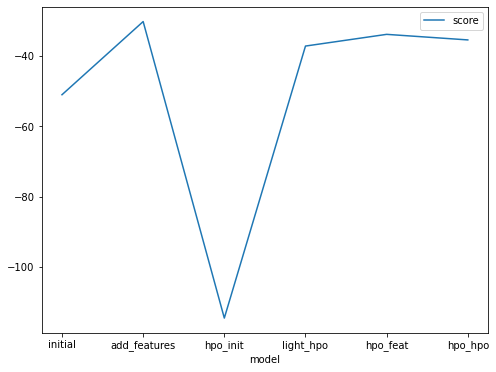

In [19]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", 'hpo_init', "light_hpo", 'hpo_feat', 'hpo_hpo'],
        "score": [-51.016775, -30.188990, -114.598932,  -37.163054, -33.831518, -35.414700]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')


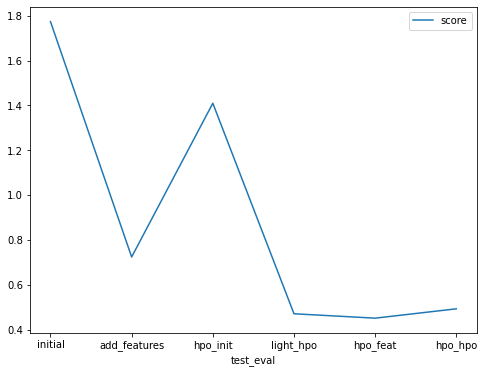

In [17]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features",  'hpo_init', "light_hpo",  'hpo_feat', 'hpo_hpo'],
        "score":  [1.77321, 0.72416,  1.40947,  0.47104, 0.45144, 0.49312]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [16]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial",    "add_features",     "hpo"],
    "hpo1": ['num_leaves',  'num_leaves',   ['num_leaves', 'num_boost_round', 'tree_learner']],
    "hpo2": ['iterations',  'iterations',   ['iterations', 'depth', 'num_epochs']],
    "hpo3": ['learning_rate',   'learning_rate',    ['learning_rate', 'dropout_prob', 'random_strength']],
    "score": [1.4094, 0.45144, 0.49312]
})

,model,hpo1,hpo2,hpo3,score
0,initial,num_leaves,iterations,learning_rate,1.40940
1,add_features,num_leaves,iterations,learning_rate,0.45144
2,hpo,"[num_leaves, num_boost_round, tree_learner]","[iterations, depth, num_epochs]","[learning_rate, dropout_prob, random_strength]",0.49312
